In [45]:
# Importação da bibliotecas que seram utilizadas no projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

In [46]:
# Importando a base de tados


df = pd.read_csv('dados_regressao.csv')
df.head


<bound method NDFrame.head of        sexo  idade  experiencia  escolaridade       salario
0     Homem     49           33            12  76058.935879
1     Homem     49           33             9  75116.620159
2     Homem     44           11             8  52445.074167
3    Mulher     35           36            19  56891.606445
4     Homem     43           10            11  47646.556098
..      ...    ...          ...           ...           ...
195   Homem     25           28            17  58237.358911
196   Homem     35            6            16  37909.002304
197  Mulher     34            9            10  49687.356581
198   Homem     38           33            20  59944.807820
199  Mulher     22           19            13  45735.122344

[200 rows x 5 columns]>

### **1. Exploração Inicial dos Dados**

Temos nesse data frame 200 linhas e 5 colunas

Resumo estatístico das variáveis

In [47]:
# Verificando as descrições estatisticas da base de dados

df.describe()

,idade,experiencia,escolaridade,salario
count,200.000000,200.000000,200.000000,200.000000
mean,40.380000,20.210000,14.065000,56324.441292
std,11.349434,11.814985,3.593794,11484.491146
min,20.000000,1.000000,8.000000,33290.318037
25%,31.000000,9.000000,11.000000,47972.723059
50%,41.000000,20.000000,14.000000,56821.152998
75%,49.000000,30.250000,17.000000,63312.406635
max,60.000000,40.000000,20.000000,88894.113282


Observamos que temos Salarios de 33290,31 a 88894,11 e podemos observar acima a mediana, media, desvio padrão e os quartis. Não foi detectado nenhum comportamento inesperado nos dados. 

In [48]:
df.dtypes

sexo             object
idade             int64
experiencia       int64
escolaridade      int64
salario         float64
dtype: object

In [50]:
df.isnull().sum()

sexo            0
idade           0
experiencia     0
escolaridade    0
salario         0
dtype: int64

In [51]:
print(df.duplicated().sum())

0


Verificamos os tipos dos dados e estão corretos, assim como tambem não tem dados faltantes, e nem duplicados.

### **2. Escolha da Variável Explicativa**

Criando Graficos de dispersão  do `salario` em função de cada variável explicativa (`idade`, `experiencia`, `escolaridade`)

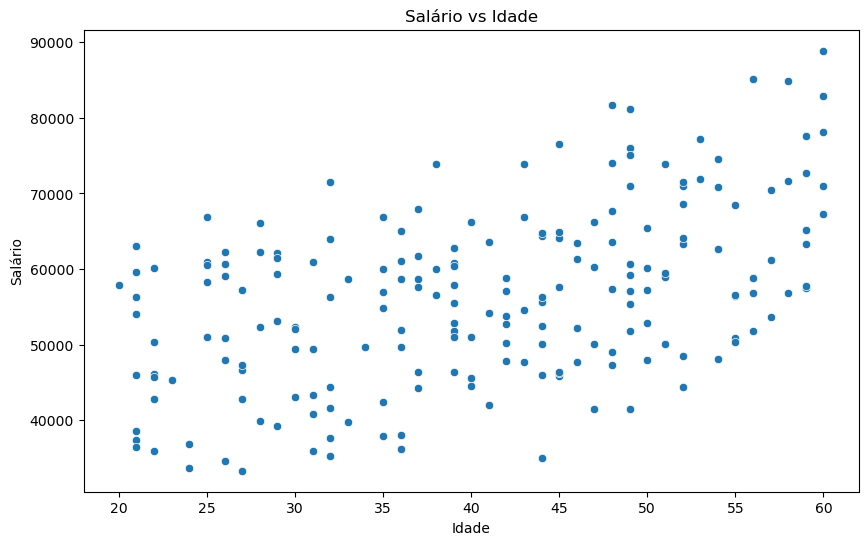

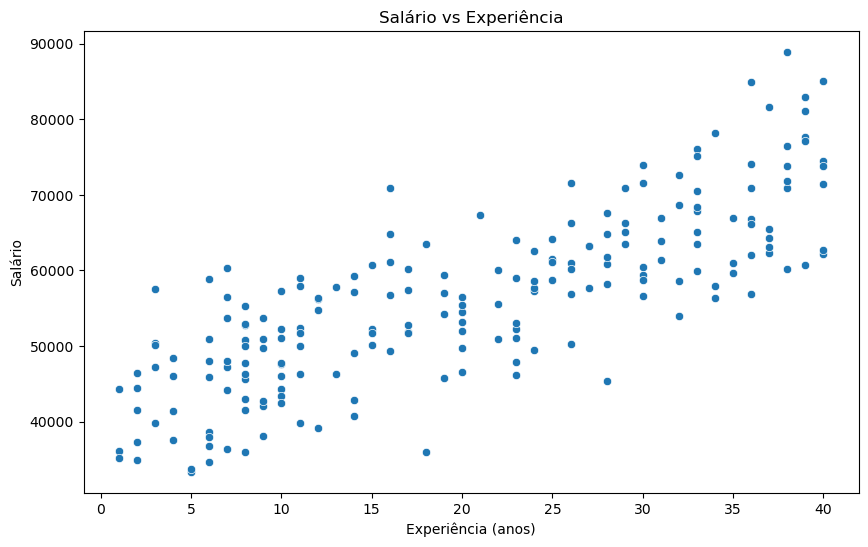

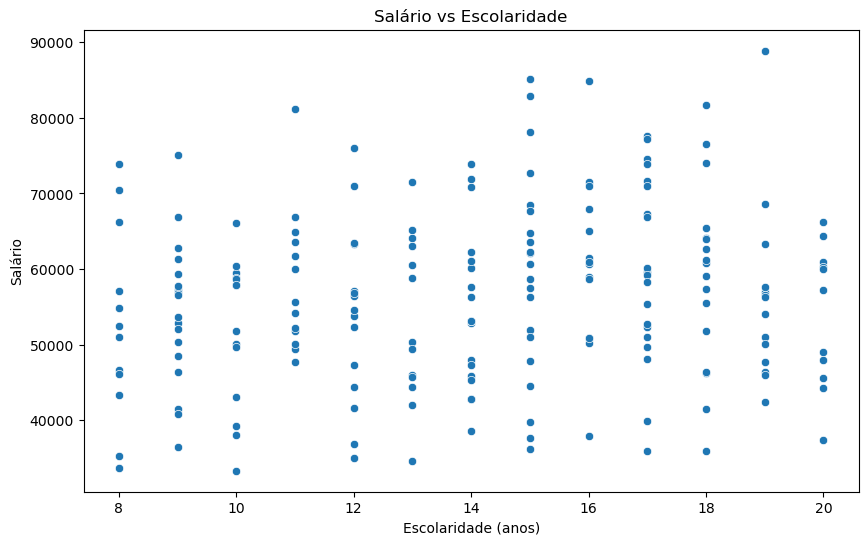

In [53]:
# Gráfico de dispersão: Salário vs Idade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='salario', data=df)
plt.title('Salário vs Idade')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

# Gráfico de dispersão: Salário vs Experiência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experiencia', y='salario', data=df)
plt.title('Salário vs Experiência')
plt.xlabel('Experiência (anos)')
plt.ylabel('Salário')
plt.show()

# Gráfico de dispersão: Salário vs Escolaridade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='escolaridade', y='salario', data=df)
plt.title('Salário vs Escolaridade')
plt.xlabel('Escolaridade (anos)')
plt.ylabel('Salário')
plt.show()

Analisando os graficos acima vemos que as variáveis Salário vs Idade tem uma realçao quase linear mas ainda dispersa entre elas, Isso indica que a idade pode ter influência no salário mas não é uma relação perfeitamente linear.

Salário vs Experiência parece ser a relação mais linear entre todas variáveis, com isso espera-se que a experiência tenha uma forte correlação com o salário.

Salário vs Escolaridade é a relação que aparenta menos linear sendo mais dispersa, embora a escolaridade possa influenciar no salário a relação não é tão direta qanto a experiência.

Com Base nos Graficos acima vemos que a variável que aparenta melhor relação linear com a variável salário é a experiência. Por esse motivo a mesma vai ser escolhida  para ser a preditora no modelo de regressão linear simples.

### **3. Ajuste do Modelo de Regressão**

In [60]:
# Ajuste do do modelo de regressão linear
X = df[['experiencia']]
y = df['salario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# coeficientes do modelo
coeficientes = model.coef_
intercepto = model.intercept_
print(f'Coeficientes: {coeficientes}')
print(f'Intercepto: {intercepto}')



Coeficientes: [798.71545853]
Intercepto: 39985.79630305826


O intercepto reflete o salário base para alguém sem experiência. 

O coeficiente angular reflete a taxa de crescimento do salário em função da experiência.

Se os valores forem positivos, isso indica uma relação direta (mais experiência, maior salário). Se forem negativos, indicam uma relação inversa (mais experiência, menor salário, o que seria incomum neste caso).

### **4. Avaliação do Modelo**

Previsão do Modelo

In [58]:
# previsao do modelo
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

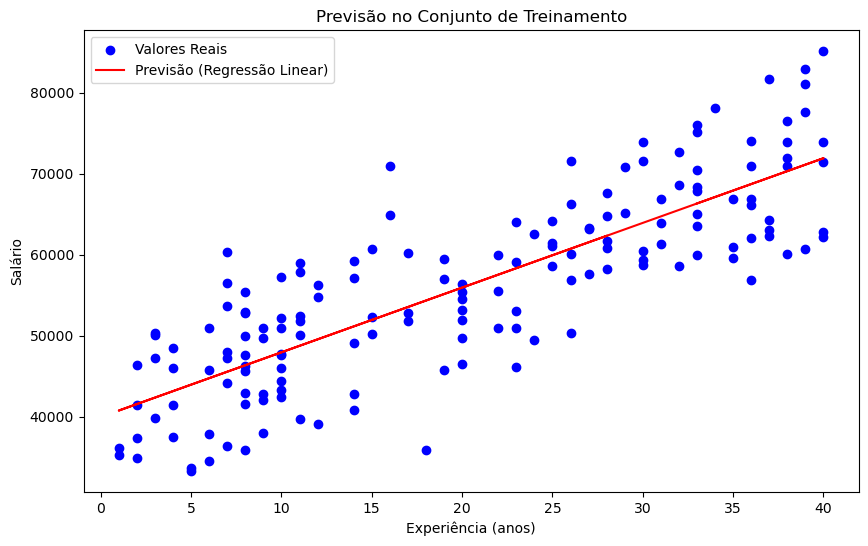

In [61]:
# Plotando a previsão no conjunto de treinamento
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Valores Reais')
plt.plot(X_train, y_pred_train, color='red', label='Previsão (Regressão Linear)')
plt.title('Previsão no Conjunto de Treinamento')
plt.xlabel('Experiência (anos)')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cálculo do Erro Quadrático Médio (EQM)
eqm = mean_squared_error(y_train, y_pred_train)
print(f'Erro Quadrático Médio (EQM): {eqm}')

# Cálculo do Erro Absoluto Médio (MAE)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'Erro Absoluto Médio (MAE): {mae}')

# Cálculo do Erro Percentual Absoluto Médio (MAPE)
mape = (abs((y_train - y_pred_train) / y_train).mean()) * 100
print(f'Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%')

Erro Quadrático Médio (EQM): 43609705.02151558
Erro Absoluto Médio (MAE): 5413.3482561939045
Erro Percentual Absoluto Médio (MAPE): 10.18%


Com base nos valores das métricas fornecidos:

Erro Quadrático Médio (EQM): 43.609.705,02

Esse valor é relativamente alto, mas eu preciso analisá-lo em relação à escala dos salários. Como os salários variam entre aproximadamente 33.290 e 88.894, considero que o EQM pode ser aceitável, embora indique que há erros significativos em algumas previsões.


Erro Absoluto Médio (MAE): 5.413,35

Esse valor me mostra que, em média, o modelo erra cerca de R$ 5.413,35 ao prever o salário. Comparado à faixa de salários, considero esse erro moderado, mas ele pode ser significativo dependendo do contexto.


Erro Percentual Absoluto Médio (MAPE): 10,18%

Um MAPE de 10,18% é, na minha opinião, bom, pois está próximo do limite inferior da faixa aceitável (10% a 20%). Isso me indica que o modelo tem um desempenho razoável na previsão de salários.


Considero que o modelo é adequado para prever salario, especialmente considerando o MAPE, que está em um nível aceitável. No entanto, o EQM e o MAE sugerem que o modelo pode ser melhorado. 

### **5. Comparação por Gênero**

Ajuste do modelo separado para homens e um para mulheres

In [63]:
# Separando os dados por gênero
df_homens = df[df['sexo'] == 'Homem']
df_mulheres = df[df['sexo'] == 'Mulher']

# Ajustando o modelo para homens
X_homens = df_homens[['experiencia']]
y_homens = df_homens['salario']
model_homens = LinearRegression()
model_homens.fit(X_homens, y_homens)

# Ajustando o modelo para mulheres
X_mulheres = df_mulheres[['experiencia']]
y_mulheres = df_mulheres['salario']
model_mulheres = LinearRegression()
model_mulheres.fit(X_mulheres, y_mulheres)

# Coeficientes dos modelos
coef_homens = model_homens.coef_[0]
intercepto_homens = model_homens.intercept_
coef_mulheres = model_mulheres.coef_[0]
intercepto_mulheres = model_mulheres.intercept_

# Exibindo os resultados
print(f'Modelo para Homens: Coeficiente = {coef_homens}, Intercepto = {intercepto_homens}')
print(f'Modelo para Mulheres: Coeficiente = {coef_mulheres}, Intercepto = {intercepto_mulheres}')


Modelo para Homens: Coeficiente = 733.7730021698885, Intercepto = 41728.85972913705
Modelo para Mulheres: Coeficiente = 816.856851770595, Intercepto = 39544.511571352195


Com base nos coeficientes dos modelos ajustados:

Modelo para Homens:

Coeficiente: 733,77
Indica que, para cada ano adicional de experiência, o salário dos homens aumenta, em média, R$ 733,77.

Intercepto: 41.728,86
Representa o salário base esperado para homens sem experiência.


Modelo para Mulheres:

Coeficiente: 816,86
Indica que, para cada ano adicional de experiência, o salário das mulheres aumenta, em média, R$ 816,86.

Intercepto: 39.544,51
Representa o salário base esperado para mulheres sem experiência.

O coeficiente para mulheres (816,86) é maior do que para homens (733,77), sugerindo que a experiência tem um impacto ligeiramente maior no salário das mulheres.

O intercepto para homens (41.728,86) é maior do que para mulheres (39.544,51), indicando que, sem experiência, os homens têm um salário base maior.

Embora os coeficientes sejam relativamente próximos, há uma diferença notável no impacto da experiência e no salário base entre homens e mulheres. Isso pode indicar diferenças na forma como a experiência é valorizada ou diferenças estruturais nos salários iniciais entre os dois grupos.

Comparando os erros (EQM, MAE e MAPE) dos dois modelos

In [64]:
# Previsões para homens
y_pred_homens = model_homens.predict(X_homens)
eqm_homens = mean_squared_error(y_homens, y_pred_homens)
mae_homens = mean_absolute_error(y_homens, y_pred_homens)
mape_homens = (abs((y_homens - y_pred_homens) / y_homens).mean()) * 100

# Previsões para mulheres
y_pred_mulheres = model_mulheres.predict(X_mulheres)
eqm_mulheres = mean_squared_error(y_mulheres, y_pred_mulheres)
mae_mulheres = mean_absolute_error(y_mulheres, y_pred_mulheres)
mape_mulheres = (abs((y_mulheres - y_pred_mulheres) / y_mulheres).mean()) * 100

# Exibindo os resultados
print(f'Erros para Homens: EQM = {eqm_homens}, MAE = {mae_homens}, MAPE = {mape_homens:.2f}%')
print(f'Erros para Mulheres: EQM = {eqm_mulheres}, MAE = {mae_mulheres}, MAPE = {mape_mulheres:.2f}%')

Erros para Homens: EQM = 45056668.46212979, MAE = 5451.537514391026, MAPE = 10.11%
Erros para Mulheres: EQM = 49644071.280976504, MAE = 5715.296967292734, MAPE = 10.65%


Com base nos erros calculados para os dois modelos:

Erros para Homens:
EQM: 45.056.668,46
MAE: 5.451,54
MAPE: 10,11%

Erros para Mulheres:
EQM: 49.644.071,28
MAE: 5.715,30
MAPE: 10,65%

EQM: O modelo para homens apresenta um EQM menor (45.056.668,46 contra 49.644.071,28), indicando que as previsões para homens têm erros quadráticos ligeiramente menores.

MAE: O modelo para homens também tem um MAE menor (5.451,54 contra 5.715,30), sugerindo que, em média, os erros absolutos são menores para homens.

MAPE: O modelo para homens apresenta um MAPE menor (10,11% contra 10,65%), indicando que as previsões para homens são ligeiramente mais precisas em termos percentuais.

O modelo para homens tem previsões mais precisas em comparação ao modelo para mulheres, com erros ligeiramente menores em todas as métricas (EQM, MAE e MAPE). No entanto, as diferenças não são muito significativas, sugerindo que ambos os modelos têm desempenhos semelhantes.

### **6. Interpretação e Conclusões**

Com base na análise realizada, a variável **`experiencia`** parece ser um bom preditor do `salario`, mas com algumas limitações:

### Pontos a favor:
**Correlação Linear**:
   A análise gráfica mostrou que a relação entre `experiencia` e `salario` é quase linear, o que justifica o uso da regressão linear simples.
   
**MAPE**:
   O MAPE para ambos os modelos (10,11% para homens e 10,65% para mulheres) está dentro da faixa aceitável (10% a 20%), indicando que o modelo tem um desempenho razoável.

**Coeficientes**:
   Os coeficientes positivos indicam que a experiência tem um impacto direto no aumento do salário, o que faz sentido no contexto.

### Limitações:
**Erro Absoluto Médio (MAE)**:
   O MAE (cerca de R$ 5.400 para homens e R$ 5.700 para mulheres) é relativamente alto em relação à faixa de salários (R$ 33.290 a R$ 88.894), indicando que o modelo pode não capturar toda a variabilidade dos dados.

**Erro Quadrático Médio (EQM)**:
   O EQM elevado sugere que há erros significativos em algumas previsões, possivelmente devido a outliers ou outros fatores não capturados pelo modelo.

**Fatores Não Considerados**:
   Variáveis como `idade`, `escolaridade` ou outros fatores podem influenciar o salário e não foram incluídas no modelo. Isso pode limitar a capacidade preditiva da variável `experiencia`.

### Conclusão:
A variável **`experiencia`** é um bom preditor do `salario`, mas não é suficiente para capturar toda a complexidade da relação. Para melhorar o modelo, seria interessante incluir outras variáveis explicativas e explorar modelos mais complexos, como a regressão múltipla.